<a href="https://colab.research.google.com/github/demiurge/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [11]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [16]:
model = Sequential ([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  Flatten(),
  Dense(num_classes, activation='softmax'),
])

# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 9.4215 - accuracy: 0.7844


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential ([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax'),
  ])

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir =os.path.join("logs", datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histtrained_modelogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks=[tensorboard_callback]
      )
  return model

In [20]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 27.7272 - accuracy: 0.7509 - val_loss: 0.1982 - val_accuracy: 0.9528
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1848 - accuracy: 0.9585 - val_loss: 0.1171 - val_accuracy: 0.9755
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1013 - accuracy: 0.9762 - val_loss: 0.0771 - val_accuracy: 0.9822
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1061 - accuracy: 0.9762 - val_loss: 0.0627 - val_accuracy: 0.9850
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.0790 - accuracy: 0.9815 - val_loss: 0.0412 - val_accuracy: 0.9897


In [21]:
y_pred_prob = model_trained.predict(X_test)
y_pred_prob

array([[3.08840331e-09, 9.41301056e-04, 2.97857005e-05, ...,
        8.01601738e-04, 2.99865659e-02, 8.28851444e-06],
       [1.80610158e-08, 4.29072976e-03, 9.63722181e-04, ...,
        5.73586561e-02, 8.96515325e-04, 1.71177380e-04],
       [4.98527131e-09, 3.74363532e-04, 1.46270559e-05, ...,
        7.13377143e-04, 6.21984065e-01, 2.21483751e-05],
       ...,
       [2.32964758e-05, 5.41216519e-04, 1.44348701e-03, ...,
        2.59113288e-03, 3.01009801e-04, 4.56841826e-06],
       [2.32276125e-06, 6.59759535e-05, 3.00064363e-04, ...,
        4.39664442e-03, 5.95927704e-05, 3.30976695e-06],
       [3.02702051e-06, 1.07877415e-04, 1.19591120e-03, ...,
        7.24586018e-04, 1.43796846e-04, 5.38636812e-07]], dtype=float32)

In [30]:
y_pred_prob[400]

array([3.3426017e-15, 9.9999285e-01, 2.3518565e-17, 9.8506644e-19,
       7.1813015e-06, 3.1183657e-14, 6.2010145e-27, 1.7710677e-24,
       2.6864357e-33, 6.1996405e-20, 2.2430067e-35, 6.0971756e-26,
       7.7534953e-19, 1.0597625e-30, 8.3024120e-32, 3.6426005e-31,
       6.1329535e-28, 0.0000000e+00, 1.0393836e-23, 2.9071623e-37,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.3588425e-33,
       5.1624450e-32, 8.9960800e-38, 2.7303272e-38, 0.0000000e+00,
       1.9902149e-26, 2.7080574e-30, 6.3222519e-36, 2.5869349e-31,
       4.3601821e-26, 1.8851563e-30, 4.2226319e-34, 1.0783206e-24,
       0.0000000e+00, 0.0000000e+00, 2.7689520e-27, 0.0000000e+00,
       3.5593600e-31, 0.0000000e+00, 1.3545441e-27], dtype=float32)

ERROR! Session/line number was not unique in database. History logging moved to new session 61


<BarContainer object of 43 artists>

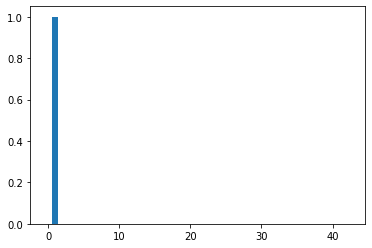

In [35]:
plt.bar(range(43), y_pred_prob[400])

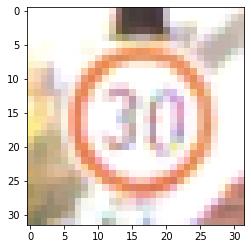

In [25]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [29]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (30km/h)'

In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score ):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred) 

In [42]:
predict(model_trained, X_test, y_test)

0.8378684807256236

In [45]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential ([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax'),
  ])


def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)


train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 5.7055 - accuracy: 0.2057 - val_loss: 1.7489 - val_accuracy: 0.5282
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 1.5624 - accuracy: 0.5436 - val_loss: 0.7200 - val_accuracy: 0.8054
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.8580 - accuracy: 0.7396 - val_loss: 0.2854 - val_accuracy: 0.9374
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.5096 - accuracy: 0.8464 - val_loss: 0.1459 - val_accuracy: 0.9684
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.3597 - accuracy: 0.8906 - val_loss: 0.0864 - val_accuracy: 0.9827


0.9072562358276643

In [46]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential ([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 1.9726 - accuracy: 0.5555 - val_loss: 0.5276 - val_accuracy: 0.8802
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.6909 - accuracy: 0.7913 - val_loss: 0.2829 - val_accuracy: 0.9251
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.4569 - accuracy: 0.8568 - val_loss: 0.1403 - val_accuracy: 0.9661
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3198 - accuracy: 0.8988 - val_loss: 0.0779 - val_accuracy: 0.9810
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2379 - accuracy: 0.9250 - val_loss: 0.0485 - val_accuracy: 0.9882


0.9299319727891157

In [52]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential ([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.4322 - accuracy: 0.3471 - val_loss: 0.8102 - val_accuracy: 0.7779
Epoch 2/5
272/272 [==============================] - 4s 14ms/step - loss: 0.7377 - accuracy: 0.7738 - val_loss: 0.2211 - val_accuracy: 0.9374
Epoch 3/5
272/272 [==============================] - 4s 14ms/step - loss: 0.3902 - accuracy: 0.8799 - val_loss: 0.0872 - val_accuracy: 0.9778
Epoch 4/5
272/272 [==============================] - 4s 14ms/step - loss: 0.2559 - accuracy: 0.9221 - val_loss: 0.0704 - val_accuracy: 0.9795
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1966 - accuracy: 0.9414 - val_loss: 0.0402 - val_accuracy: 0.9897


0.9655328798185941

In [53]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential ([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
  ])


#get_cnn_v4(input_shape, num_classes).summary()
train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 2.7637 - accuracy: 0.2479 - val_loss: 1.2248 - val_accuracy: 0.5829
Epoch 2/5
272/272 [==============================] - 4s 16ms/step - loss: 1.0061 - accuracy: 0.6667 - val_loss: 0.2880 - val_accuracy: 0.9111
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.4908 - accuracy: 0.8413 - val_loss: 0.1262 - val_accuracy: 0.9598
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.3114 - accuracy: 0.9011 - val_loss: 0.0728 - val_accuracy: 0.9783
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2353 - accuracy: 0.9263 - val_loss: 0.0577 - val_accuracy: 0.9828


0.9625850340136054

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [60]:
model = get_cnn_v5((32, 32, 1),num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 16ms/step - loss: 2.9228 - accuracy: 0.1878 - val_loss: 1.1300 - val_accuracy: 0.6650
Epoch 2/5
272/272 [==============================] - 4s 15ms/step - loss: 0.6691 - accuracy: 0.7854 - val_loss: 0.1792 - val_accuracy: 0.9420
Epoch 3/5
272/272 [==============================] - 4s 15ms/step - loss: 0.2584 - accuracy: 0.9189 - val_loss: 0.0629 - val_accuracy: 0.9814
Epoch 4/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1556 - accuracy: 0.9514 - val_loss: 0.0446 - val_accuracy: 0.9858
Epoch 5/5
272/272 [==============================] - 4s 15ms/step - loss: 0.1284 - accuracy: 0.9602 - val_loss: 0.0248 - val_accuracy: 0.9931


0.9798185941043084

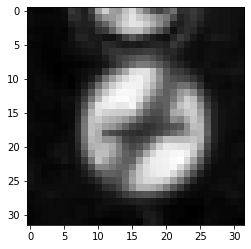

In [55]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))